Probabilities matrix:
[[0.10180021 0.12189429 0.08694945 0.06714662 0.10266629 0.06842635
  0.12268286 0.08833526 0.12045552 0.11964314]
 [0.10448082 0.11637204 0.08904665 0.07332066 0.10163946 0.06807988
  0.11887195 0.08095883 0.12458823 0.12264148]
 [0.10433934 0.12466531 0.08004824 0.06314229 0.10965209 0.06753581
  0.12111027 0.09287878 0.11456395 0.12206391]
 [0.10071994 0.12831116 0.07892787 0.05916315 0.11042054 0.06810336
  0.12559972 0.09717905 0.11260097 0.11897425]
 [0.10266629 0.11857937 0.09137674 0.07361369 0.09752143 0.07126944
  0.12025883 0.08133689 0.12513588 0.11824145]
 [0.10263953 0.11913979 0.08441977 0.06810336 0.10690416 0.06661264
  0.12198239 0.08582514 0.12105388 0.12331935]
 [0.10515673 0.11887195 0.08650734 0.07177127 0.103079   0.06970422
  0.11829668 0.0830348  0.1219     0.12167801]
 [0.10600232 0.11334236 0.09287878 0.07774324 0.09760426 0.06866011
  0.11624873 0.07645025 0.12806002 0.12300993]
 [0.10324758 0.12458823 0.08183139 0.06434341 0.10725933 0

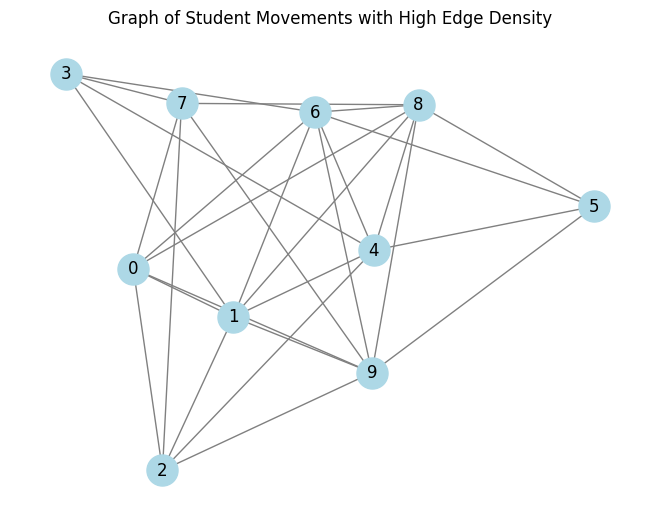

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# 1. Дискретная математика: создание большого графа
def create_large_graph(num_nodes, num_edges):
    G = nx.erdos_renyi_graph(num_nodes, num_edges / (num_nodes * (num_nodes - 1) / 2))
    return G

# 2. Линейная алгебра: вычисление матрицы перехода
def compute_transition_matrix(graph):
    adj_matrix = nx.to_numpy_array(graph)
    degree_matrix = np.diag(np.sum(adj_matrix, axis=1))

    # Проверяем, не вырожденная ли матрица
    if np.linalg.matrix_rank(degree_matrix) < degree_matrix.shape[0]:
        raise np.linalg.LinAlgError("Singular matrix encountered during transition matrix computation.")

    transition_matrix = np.linalg.inv(degree_matrix) @ adj_matrix
    return transition_matrix

# 3. Линейная алгебра: вычисление векторов вероятностей
def compute_probabilities(transition_matrix, steps=10):
    probabilities = np.linalg.matrix_power(transition_matrix, steps)
    return probabilities

# 4. Геометрия: визуализация большого графа
def plot_graph(graph, probabilities):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_size=500, node_color='lightblue', edge_color='gray')
    labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)
    plt.title("Graph of Student Movements with High Edge Density")
    plt.show()

# Пример использования для большого графа
num_nodes = 10  # Количество узлов
num_edges = 30  # Количество ребер

try:
    graph = create_large_graph(num_nodes, num_edges)
    transition_matrix = compute_transition_matrix(graph)
    probabilities = compute_probabilities(transition_matrix, steps=5)

    print("Probabilities matrix:")
    print(probabilities)

    plot_graph(graph, probabilities)
except np.linalg.LinAlgError as e:
    print(f"Error: {e}")


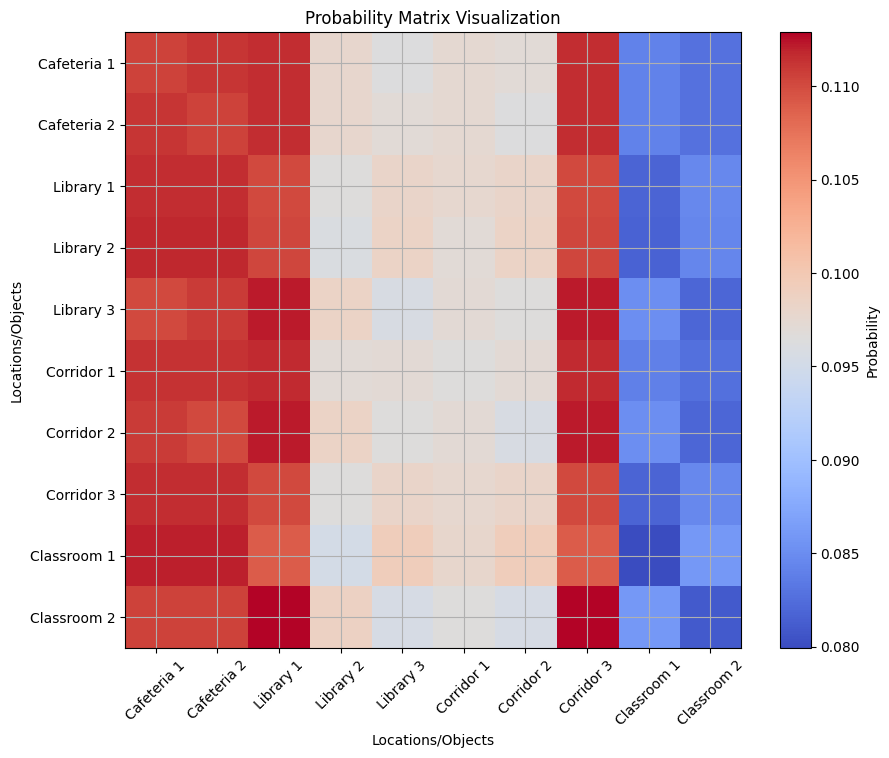

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Example input probabilities matrix
probabilities_matrix = np.array([
    [0.110446, 0.11108946, 0.11148989, 0.09782124, 0.09638072, 0.0973487,  0.09702418, 0.11148989, 0.08405095, 0.08285898],
    [0.11108946, 0.110446,   0.11148989, 0.09782124, 0.09702418, 0.0973487,  0.09638072, 0.11148989, 0.08405095, 0.08285898],
    [0.11148989, 0.11148989, 0.11006675, 0.09648236, 0.09814642, 0.09767781, 0.09814642, 0.11009726, 0.08173441, 0.0846688],
    [0.11179571, 0.11179571, 0.11026555, 0.09595066, 0.09834036, 0.09701634, 0.09834036, 0.11026555, 0.08171752, 0.08451224],
    [0.11014939, 0.11088477, 0.11216734, 0.09834036, 0.09571641, 0.09707342, 0.09645179, 0.11216734, 0.08513676, 0.08191242],
    [0.11125566, 0.11125566, 0.11163178, 0.09701634, 0.09707342, 0.09649411, 0.09707342, 0.11163178, 0.08391768, 0.08265015],
    [0.11088477, 0.11014939, 0.11216734, 0.09834036, 0.09645179, 0.09707342, 0.09571641, 0.11216734, 0.08513676, 0.08191242],
    [0.11148989, 0.11148989, 0.11009726, 0.09648236, 0.09814642, 0.09767781, 0.09814642, 0.11006675, 0.08173441, 0.0846688],
    [0.11206793, 0.11206793, 0.10897922, 0.0953371,  0.09932622, 0.09790396, 0.09932622, 0.10897922, 0.07991927, 0.08609292],
    [0.11047865, 0.11047865, 0.11289173, 0.09859762, 0.09556449, 0.09642517, 0.09556449, 0.11289173, 0.08609292, 0.08101455]
])

# Node names
node_names = [
    "Cafeteria 1", "Cafeteria 2", "Library 1", "Library 2", "Library 3",
    "Corridor 1", "Corridor 2", "Corridor 3", "Classroom 1", "Classroom 2"
]

# Visualization of probabilities matrix
plt.figure(figsize=(10, 8))
plt.imshow(probabilities_matrix, interpolation='nearest', cmap='coolwarm')
plt.colorbar(label='Probability')
plt.xticks(range(len(node_names)), node_names, rotation=45, fontsize=10)
plt.yticks(range(len(node_names)), node_names, fontsize=10)
plt.title('Probability Matrix Visualization')
plt.xlabel('Locations/Objects')
plt.ylabel('Locations/Objects')
plt.grid(True)
plt.show()